<a href="https://colab.research.google.com/github/farshadnp/Data-Mining-Exercises-Code/blob/main/CarDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [7]:
labels = ['nissan', 'pegu','samand','pride','toyota']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#Now we can easily fetch our train and validation data.
train = get_data('/content/drive/MyDrive/train')
val =   get_data('/content/drive/MyDrive/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


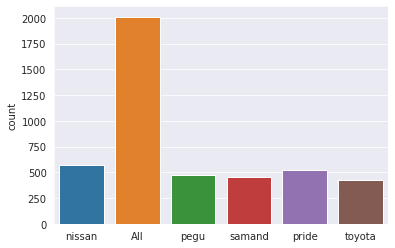

In [10]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("nissan")
    if(i[1] == 1):
        l.append("pegu")
    if(i[1] == 2):
        l.append("samand")
    if(i[1] == 3):
        l.append("pride")
    if(i[1] == 4):
        l.append("toyota")
    else:
        l.append("All")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'nissan')

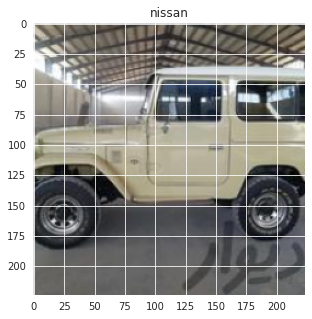

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(train[2100][0])
plt.title(labels[train[0][1]])

In [12]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [13]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5, activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [14]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [15]:
history = model.fit(x_train,y_train,epochs = 1200 , validation_data = (x_val, y_val))

Epoch 1/1200
77/77 [==============================] - 38s 63ms/step - loss: 1.6270 - accuracy: 0.1852 - val_loss: 1.6117 - val_accuracy: 0.1963
Epoch 2/1200
77/77 [==============================] - 3s 42ms/step - loss: 1.6020 - accuracy: 0.2568 - val_loss: 1.6100 - val_accuracy: 0.1826
Epoch 3/1200
77/77 [==============================] - 3s 43ms/step - loss: 1.5897 - accuracy: 0.2706 - val_loss: 1.6030 - val_accuracy: 0.1908
Epoch 4/1200
77/77 [==============================] - 3s 43ms/step - loss: 1.5809 - accuracy: 0.2643 - val_loss: 1.5975 - val_accuracy: 0.1915
Epoch 5/1200
77/77 [==============================] - 3s 42ms/step - loss: 1.5789 - accuracy: 0.2761 - val_loss: 1.5879 - val_accuracy: 0.2011
Epoch 6/1200
77/77 [==============================] - 3s 43ms/step - loss: 1.5634 - accuracy: 0.2873 - val_loss: 1.5782 - val_accuracy: 0.2257
Epoch 7/1200
77/77 [==============================] - 3s 43ms/step - loss: 1.5566 - accuracy: 0.2788 - val_loss: 1.5696 - val_accuracy: 0.230

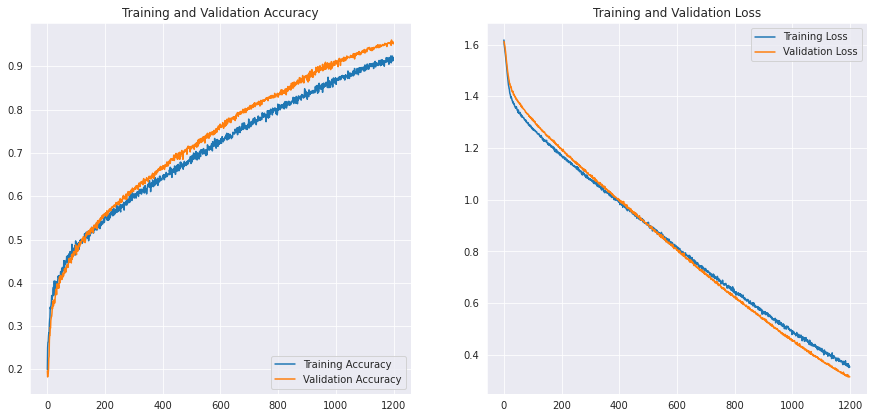

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['nissan (Class 0)','pegu (Class 1)','samand (Class 2)','pride (Class 3)','toyota (Class 4)']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                  precision    recall  f1-score   support

nissan (Class 0)       0.96      0.99      0.97       252
  pegu (Class 1)       0.98      0.91      0.95       297
samand (Class 2)       0.98      0.95      0.96       341
 pride (Class 3)       0.90      0.97      0.93       286
toyota (Class 4)       0.94      0.95      0.95       286

        accuracy                           0.95      1462
       macro avg       0.95      0.95      0.95      1462
    weighted avg       0.95      0.95      0.95      1462



In [21]:
#developing a model
from sklearn.tree import DecisionTreeClassifier
x_train = x_train.reshape(235,3*224*224)

clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)

clf_pruned.fit(x_train, y_train)#visualizing the tree





ValueError: ignored

In [19]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
x_val = x_val.reshape(157,3*224*224)
y_pred = clf_pruned.predict(x_val)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

ValueError: ignored

In [20]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


NameError: ignored